In [1]:
!date +%F

2019-04-24


In [2]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.sparse
import sklearn.manifold

In [3]:
print(sys.version)
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scipy version:', scipy.__version__)
print('sklearn version:', sklearn.__version__)

3.7.3 (default, Apr 22 2019, 13:41:01) 
[Clang 10.0.1 (clang-1001.0.46.4)]
numpy version: 1.16.3
pandas version: 0.24.2
scipy version: 1.2.1
sklearn version: 0.20.3


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
print('matplotlib version:', mpl.__version__)
print('seaborn version:', sns.__version__)

matplotlib version: 3.0.3
seaborn version: 0.9.0


In [6]:
# set pdf.fonttype to 42 (TrueType), editable texts in Illustrator
mpl.rcParams['pdf.fonttype'] = 42
# set fonts
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
# mpl.rcParams['figure.dpi'] = mpl.rcParams['figure.dpi'] * 1.5

In [7]:
import umap
import phate
print('umap version:', umap.__version__)
print('phate version:', phate.__version__)

umap version: 0.3.8
phate version: 0.4.2


In [8]:
from fast_tsne import fast_tsne

# Data loading

In [9]:
# load cells
cells_included = np.load('../../data/drop-seq/expr_readcount_norm_log_corrected_scaled_dimnames.npy',
                         allow_pickle=True)[1]
cells_included

array(['JD126-1-2_TTTCTATATACA.bam', 'JD126-1-2_CCTAGAAACCAG.bam',
       'JD126-1-2_TCATAGTCTATT.bam', ..., 'JD135Y_CCGATATGGTCT.bam',
       'JD135Y_ATGTGAGGATTG.bam', 'JD135Y_ATGCCCCGCGTC.bam'], dtype='<U26')

In [10]:
# load clustering
tsne_out_coords = pd.read_csv('../../data/drop-seq/tsne_out_coords.txt', index_col=0)

In [11]:
# load PCA result
%time pca_out_x = np.load('../../data/drop-seq/pca_out_x.npy')
mat = pca_out_x[:,0:10]

CPU times: user 1.19 ms, sys: 1.88 s, total: 1.89 s
Wall time: 1.9 s


In [12]:
mat.shape

(25776, 10)

# Single cell embedding

## Dimensionality reduction

In [13]:
# run t-SNE
np.random.seed(seed=20190207)
embedding_tsne = sklearn.manifold.TSNE(n_components=2, 
                                       perplexity=30.0,
                                       n_iter=3000,
                                       metric='euclidean',
                                       init='random', 
                                       verbose=1).fit_transform(mat)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 25776 samples in 0.013s...
[t-SNE] Computed neighbors for 25776 samples in 4.468s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25776
[t-SNE] Computed conditional probabilities for sample 2000 / 25776
[t-SNE] Computed conditional probabilities for sample 3000 / 25776
[t-SNE] Computed conditional probabilities for sample 4000 / 25776
[t-SNE] Computed conditional probabilities for sample 5000 / 25776
[t-SNE] Computed conditional probabilities for sample 6000 / 25776
[t-SNE] Computed conditional probabilities for sample 7000 / 25776
[t-SNE] Computed conditional probabilities for sample 8000 / 25776
[t-SNE] Computed conditional probabilities for sample 9000 / 25776
[t-SNE] Computed conditional probabilities for sample 10000 / 25776
[t-SNE] Computed conditional probabilities for sample 11000 / 25776
[t-SNE] Computed conditional probabilities for sample 12000 / 25776
[t-SNE] Computed conditional probabilities for sam

In [14]:
# run FItSNE
embedding_fitsne = fast_tsne(X=mat,
                             map_dims=2, 
                             perplexity=30,
                             seed=20190207,
                             max_iter=3000,
                             df=1.0)

In [15]:
# run UMAP 
np.random.seed(seed=20190207)
embedding_umap = umap.UMAP(n_neighbors=10,
                           n_components=2,
                           metric='euclidean',
                           min_dist=0.1,
                           verbose=True).fit_transform(mat)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=10, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


In [16]:
# run PHATE
np.random.seed(seed=20190207)
embedding_phate = phate.PHATE(n_components=2,
                              knn=10,
                              decay=40,
                              n_pca=100,
                              knn_dist='euclidean',
                              mds_dist='euclidean',
                              verbose=1).fit_transform(mat)

Calculating PHATE...
  Running PHATE on 25776 cells and 10 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 9.96 seconds.
    Calculating affinities...
    Calculated affinities in 0.52 seconds.
  Calculated graph and diffusion operator in 10.55 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.71 seconds.
    Calculating KMeans...
    Calculated KMeans in 36.21 seconds.
  Calculated landmark operator in 41.90 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 4.07 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.78 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 32.36 seconds.
Calculated PHATE in 89.69 seconds.


In [17]:
embeddings = pd.DataFrame({'tsne_x': embedding_tsne[: ,0],
                           'tsne_y': embedding_tsne[: ,1],
                           'fitsne_x': embedding_fitsne[: ,0],
                           'fitsne_y': embedding_fitsne[: ,1],
                           'umap_x': embedding_umap[: ,0],
                           'umap_y': embedding_umap[: ,1],
                           'phate_x': embedding_phate[:, 0],
                           'phate_y': embedding_phate[:, 1]}, 
                          index=tsne_out_coords.index)
embeddings['cluster'] = tsne_out_coords.loc[embeddings.index, 'cluster']
embeddings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25776 entries, JD126-1-2_TTTCTATATACA.bam to JD135Y_ATGCCCCGCGTC.bam
Data columns (total 9 columns):
tsne_x      25776 non-null float32
tsne_y      25776 non-null float32
fitsne_x    25776 non-null float64
fitsne_y    25776 non-null float64
umap_x      25776 non-null float32
umap_y      25776 non-null float32
phate_x     25776 non-null float64
phate_y     25776 non-null float64
cluster     25776 non-null int64
dtypes: float32(4), float64(4), int64(1)
memory usage: 2.8+ MB


## Dimensionality visualization

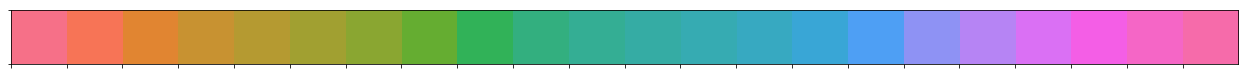

In [18]:
# match clustering colors with our previous plots
cluster_colors = sns.color_palette("husl", embeddings['cluster'].unique().shape[0])
sns.palplot(cluster_colors)

In [19]:
embeddings['color'] = embeddings['cluster'].map({i + 1:j for i, j in enumerate(cluster_colors)})

In [20]:
sns.set()

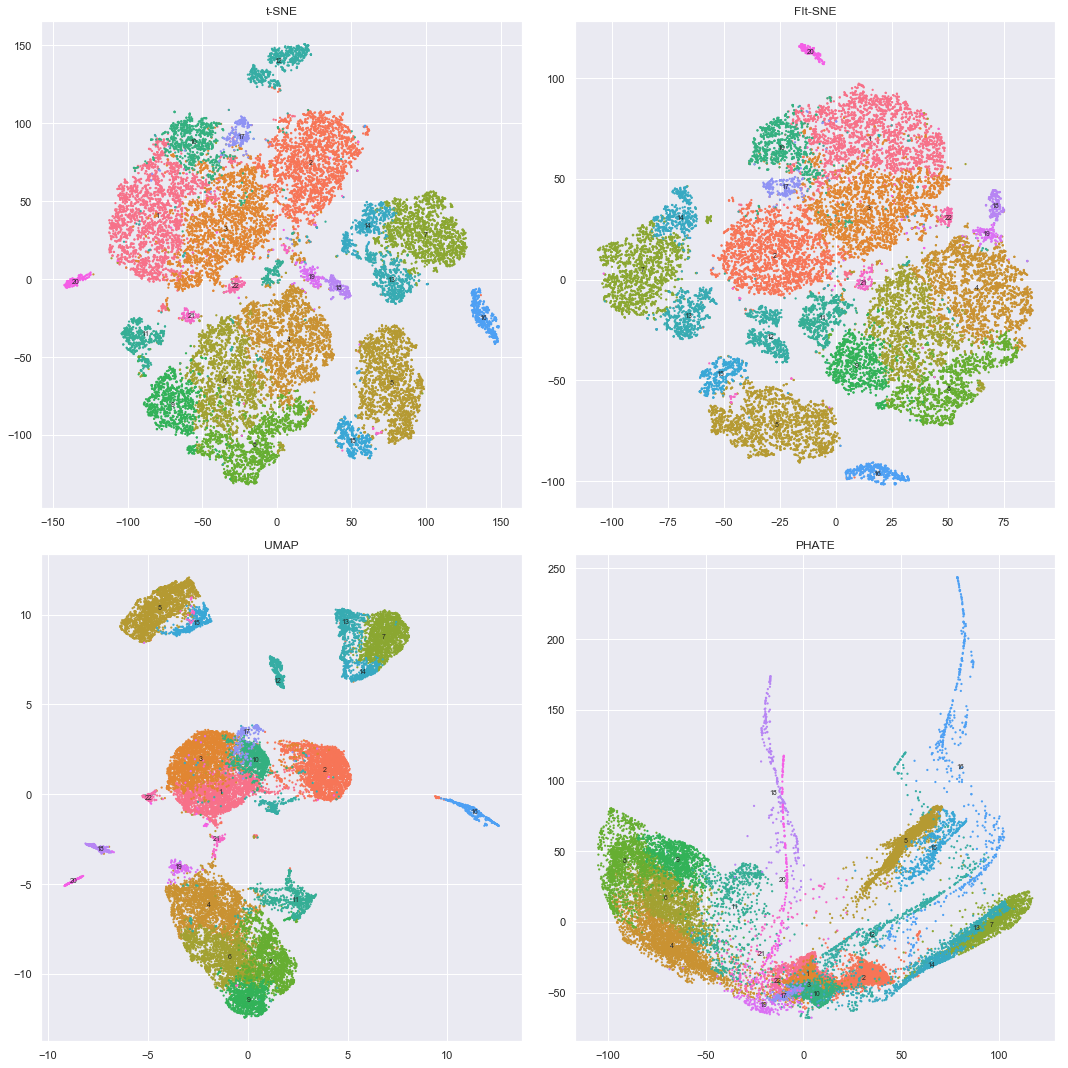

In [21]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

for i in sorted(embeddings.cluster.unique()):
    ax0.scatter(x='tsne_x',
                y='tsne_y',
                s=20,
                c='color',
                marker='.',
                linewidth=0,
                data=embeddings.loc[embeddings.cluster == i])
    
    ax1.scatter(x='fitsne_x',
                y='fitsne_y',
                s=20,
                c='color',
                marker='.',
                linewidth=0,
                data=embeddings.loc[embeddings.cluster == i])
    
    ax2.scatter(x='umap_x',
                y='umap_y',
                s=20,
                c='color',
                marker='.',
                linewidth=0,
                data=embeddings.loc[embeddings.cluster == i])
        
    ax3.scatter(x='phate_x',
                y='phate_y',
                s=20,
                c='color',
                marker='.',
                linewidth=0,
                data=embeddings.loc[embeddings.cluster == i])
    
    # add cluster labels
    ax0.annotate(s=i,
                 xy=(embeddings.loc[embeddings.cluster == i, 'tsne_x'].median(),
                     embeddings.loc[embeddings.cluster == i, 'tsne_y'].median()),
                 fontsize=7,
                 horizontalalignment='center',
                 verticalalignment='center')

    ax1.annotate(s=i,
                 xy=(embeddings.loc[embeddings.cluster == i, 'fitsne_x'].median(),
                     embeddings.loc[embeddings.cluster == i, 'fitsne_y'].median()),
                 fontsize=7,
                 horizontalalignment='center',
                 verticalalignment='center')

    ax2.annotate(s=i,
                 xy=(embeddings.loc[embeddings.cluster == i, 'umap_x'].median(),
                     embeddings.loc[embeddings.cluster == i, 'umap_y'].median()),
                 fontsize=7,
                 horizontalalignment='center',
                 verticalalignment='center')

    ax3.annotate(s=i,
                 xy=(embeddings.loc[embeddings.cluster == i, 'phate_x'].median(),
                     embeddings.loc[embeddings.cluster == i, 'phate_y'].median()),
                 fontsize=7,
                 horizontalalignment='center',
                 verticalalignment='center')

ax0.set_title('t-SNE')
ax1.set_title('FIt-SNE')
ax2.set_title('UMAP')
ax3.set_title('PHATE')

plt.tight_layout()
# fig

In [22]:
if not Path('embedding.pdf').is_file():
    fig.savefig('embedding.pdf', transparent=False)
fig.clf()